In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
# Decision Tree
data = pd.read_csv("/Users/manancy/Downloads/Nancy 2/Python/Jupyter/Projects/2 Titanic/data1-Nancy.csv")

In [21]:
x = data.iloc[:,data.columns !='Survived']      
y = data.iloc[:,data.columns == 'Survived']      

Xtrain,Xtest, Ytrain,Ytest = train_test_split(x,y,test_size=0.3)        
#print(Xtrain)

for i in [Xtrain,Xtest, Ytrain,Ytest]:
    i.index = range(i.shape[0])     

In [31]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=25,max_depth=3)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.8164794007490637

In [38]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=25)
score = cross_val_score(clf,x,y,cv=10).mean()
y_pred= clf.fit(Xtest,Ytest).predict(Xtest)
score

0.8166624106230849

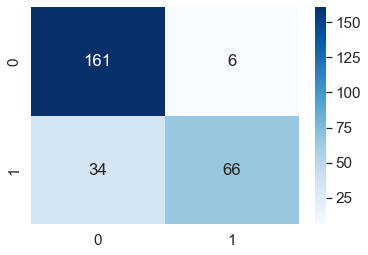

In [39]:
cm = confusion_matrix(Ytest, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt="d",cmap = "Blues")
plt.show()

In [40]:
print(classification_report(Ytest, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.825641  0.964072  0.889503       167
           1   0.916667  0.660000  0.767442       100

    accuracy                       0.850187       267
   macro avg   0.871154  0.812036  0.828472       267
weighted avg   0.859733  0.850187  0.843787       267



## Optimize parameters

0.8143896833503576


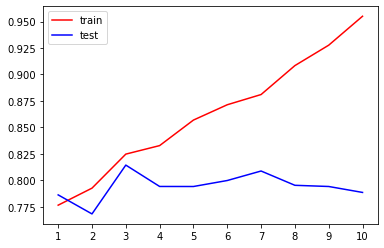

In [24]:
tr=[]
te=[]
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                 ,max_depth=i+1)
    clf = clf.fit(Xtrain,Ytrain)            
    score_tr =clf.score(Xtrain,Ytrain)      
    score_te = cross_val_score(clf,x,y,cv=10).mean()    
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color='red',label='train') 
plt.plot(range(1,11),te,color='blue',label='test')
plt.xticks(range(1,11))
plt.legend()
plt.show()


0.8166624106230849


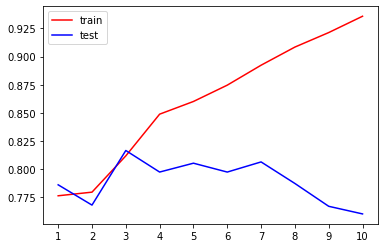

In [25]:
tr=[]
te=[]
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25,criterion='entropy'
                                 ,max_depth=i+1)
    clf = clf.fit(Xtrain,Ytrain)            
    score_tr =clf.score(Xtrain,Ytrain)     
    score_te = cross_val_score(clf,x,y,cv=10).mean()    
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color='red',label='train') 
plt.plot(range(1,11),te,color='blue',label='test')
plt.xticks(range(1,11))
plt.legend()
plt.show()

### GridSearch

In [26]:
import numpy as np
gini_thresholds = np.linspace(0,0.5,20) 
#entropy_threholds = np.linspace(0,1,50)    
parameters = {'splitter':('best','random')
                ,'criterion':("gini","entropy")
                ,"max_depth":[*range(1,10)]
                ,'min_samples_leaf':[*range(1,50,5)]
                ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
                }
clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)

print(GS.best_params_)
print(GS.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 6, 'splitter': 'random'}
0.8134664618535586
